# Semster Test

# Problem 1

You work for a telecoms company. Your boss has asked you to build a forecast model to predict usage (Total_Call_Hours) of the network for the next month.

Each of you will receive your own data file named {student_id}_data.csv The data in the file consists of a number of peoples daily phone records from 2010 to 2016.

Follow the below process to produce a forecast model. If it is a word question just type in the text else you must present code.

In [115]:
### Do your imports here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox

## Question 1 (1)

Read in your data and follow your inital EDA. Since the data is randomly generated you do not need to validate it against an external data source. Just print out each of the following steps.

1. Read in your data
2. Check the packaging
3. Look at the top and the bottom of your data
4. Check your “n”s


 Reading in the Data

In [2]:
calls = pd.read_csv('714188_data.csv')

Checking the packaging 



In [3]:
calls.shape

(52917, 4)

In [4]:
calls.shape[0]

52917

In [5]:
calls.shape[1]

4

Looking at the top and bottom of the data

In [6]:
### use the print() statement to print out the above steps
calls.head()

,Name,Call_Start,Call_End,Call_Phone_No
0,Tammy Jimenez,2010-01-23 17:21:47,2010-01-23 17:27:04,(506)446-5753
1,Travis Mcneil,2010-01-27 14:00:50,2010-01-27 14:18:46,131-008-3082x060
2,Brandi Price,2010-01-22 04:22:24,2010-01-22 04:35:27,152.360.0249x7886
3,Timothy Gibbs,2010-01-16 10:04:19,2010-01-16 10:05:06,(984)175-0174x726
4,Michael Logan,2010-01-15 09:33:02,2010-01-15 09:47:26,(079)310-0454x65703


In [7]:
calls.tail(5)

,Name,Call_Start,Call_End,Call_Phone_No
52912,Julia Obrien,2016-12-02 22:57:51,2016-12-02 23:17:50,09440407675
52913,James Hood,2016-12-08 17:12:40,2016-12-08 17:31:16,934.104.3666x345
52914,Alexandra Smith,2016-12-22 11:35:00,2016-12-22 11:43:14,715.919.0821x85294
52915,Barbara Henderson,2016-12-23 19:10:03,2016-12-23 19:23:02,288-388-0847x4594
52916,Curtis Johnson,2016-12-02 10:43:36,2016-12-02 10:57:41,144.255.7565x7173


checking the n's

In [8]:
print(calls.shape)

(52917, 4)


In [9]:
print(calls.ndim)

2


In [10]:
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52917 entries, 0 to 52916
Data columns (total 4 columns):
Name             52917 non-null object
Call_Start       52917 non-null object
Call_End         52917 non-null object
Call_Phone_No    52917 non-null object
dtypes: object(4)
memory usage: 1.6+ MB
None


## Question 2 (1)

Your data is not ideally formated for your analysis. Specifically you are not really interested in who made calls on each day. Rather just the total number of calls made on a given day and the total number of call hours utilised. 
Wrangle your data so that it now shows:

Date, Number_Of_Calls, Total_Call_Hours

In [11]:
Date = np.zeros(len(calls['Call_Start']),dtype = (str,11))
Number_Of_Calls = np.ones(len(calls['Call_Start']))

for i in np.arange(len(Date)):
    Date[i] = calls['Call_Start'][i].split(" ",1)[0]
    if i % 1e4 == 0:
        print (i)

0
10000
20000
30000
40000
50000


In [12]:
calls[:10]

,Name,Call_Start,Call_End,Call_Phone_No
0,Tammy Jimenez,2010-01-23 17:21:47,2010-01-23 17:27:04,(506)446-5753
1,Travis Mcneil,2010-01-27 14:00:50,2010-01-27 14:18:46,131-008-3082x060
2,Brandi Price,2010-01-22 04:22:24,2010-01-22 04:35:27,152.360.0249x7886
3,Timothy Gibbs,2010-01-16 10:04:19,2010-01-16 10:05:06,(984)175-0174x726
4,Michael Logan,2010-01-15 09:33:02,2010-01-15 09:47:26,(079)310-0454x65703
5,Alison Tucker,2010-01-17 02:26:09,2010-01-17 02:44:24,04771968654
6,Diana Anderson,2010-01-11 15:33:01,2010-01-11 15:35:38,01211859086
7,Jeffery Spears,2010-01-30 07:37:40,2010-01-30 07:39:33,279-044-5088x54896
8,Mrs. Brittany Jones,2010-01-07 04:57:46,2010-01-07 05:16:24,376.606.3705x41652
9,Jeffrey Mosley,2010-01-25 20:58:53,2010-01-25 21:09:07,133-143-4119


In [13]:
calls = calls.set_index(pd.DatetimeIndex(calls['Call_Start'].astype('datetime64[D]')))
calls[:10]

,Name,Call_Start,Call_End,Call_Phone_No
Call_Start,,,,
2010-01-23,Tammy Jimenez,2010-01-23 17:21:47,2010-01-23 17:27:04,(506)446-5753
2010-01-27,Travis Mcneil,2010-01-27 14:00:50,2010-01-27 14:18:46,131-008-3082x060
2010-01-22,Brandi Price,2010-01-22 04:22:24,2010-01-22 04:35:27,152.360.0249x7886
2010-01-16,Timothy Gibbs,2010-01-16 10:04:19,2010-01-16 10:05:06,(984)175-0174x726
2010-01-15,Michael Logan,2010-01-15 09:33:02,2010-01-15 09:47:26,(079)310-0454x65703
2010-01-17,Alison Tucker,2010-01-17 02:26:09,2010-01-17 02:44:24,04771968654
2010-01-11,Diana Anderson,2010-01-11 15:33:01,2010-01-11 15:35:38,01211859086
2010-01-30,Jeffery Spears,2010-01-30 07:37:40,2010-01-30 07:39:33,279-044-5088x54896
2010-01-07,Mrs. Brittany Jones,2010-01-07 04:57:46,2010-01-07 05:16:24,376.606.3705x41652


In [14]:
calls.index

DatetimeIndex(['2010-01-23', '2010-01-27', '2010-01-22', '2010-01-16',
               '2010-01-15', '2010-01-17', '2010-01-11', '2010-01-30',
               '2010-01-07', '2010-01-25',
               ...
               '2016-12-08', '2016-12-31', '2016-12-29', '2016-12-24',
               '2016-12-02', '2016-12-02', '2016-12-08', '2016-12-22',
               '2016-12-23', '2016-12-02'],
              dtype='datetime64[ns]', name='Call_Start', length=52917, freq=None)

In [15]:
data = pd.DataFrame(Number_Of_Calls,index = calls.index)
data.columns = ['Number_Of_Calls']
data[:10]

,Number_Of_Calls
Call_Start,
2010-01-23,1.0
2010-01-27,1.0
2010-01-22,1.0
2010-01-16,1.0
2010-01-15,1.0
2010-01-17,1.0
2010-01-11,1.0
2010-01-30,1.0
2010-01-07,1.0


In [69]:
ts1 = data.groupby(Date)['Number_Of_Calls'].sum()
ts1.columns = ['Number_Of_Calls']
frame1  = pd.DataFrame(ts1,index = ts1.index.astype('datetime64[D]'))
frame1[:5]

,Number_Of_Calls
2010-01-01,8.0
2010-01-02,10.0
2010-01-03,8.0
2010-01-04,7.0
2010-01-05,5.0


In [70]:
End = calls['Call_End'].astype('datetime64[ns]')
Start = calls['Call_Start'].astype('datetime64[ns]')
diff = End - Start

timeSeries1 = pd.Series(diff, index = calls.index)
timeSeries1 = timeSeries1.resample('D').sum()
timeSeries1[:10]

Call_Start
2010-01-01   01:06:13
2010-01-02   01:49:49
2010-01-03   01:17:47
2010-01-04   01:00:58
2010-01-05   00:30:10
2010-01-06   01:53:25
2010-01-07   01:29:21
2010-01-08   01:01:07
2010-01-09   01:27:31
2010-01-10   01:33:35
Freq: D, dtype: timedelta64[ns]

In [71]:
timeSeries1.columns = ['Total_Call_Hours']

frame2 = pd.DataFrame(timeSeries1,index = timeSeries1.index)
frame2.columns = ['Total_Call_Hours']
frame2[:5]

,Total_Call_Hours
Call_Start,
2010-01-01,01:06:13
2010-01-02,01:49:49
2010-01-03,01:17:47
2010-01-04,01:00:58
2010-01-05,00:30:10


In [72]:
frame1.shape

(2557, 1)

In [73]:
frame2.shape

(2557, 1)

In [74]:
frame1['Total_Call_Hours'] = frame2['Total_Call_Hours']

In [75]:
frame1.head(10)

,Number_Of_Calls,Total_Call_Hours
2010-01-01,8.0,01:06:13
2010-01-02,10.0,01:49:49
2010-01-03,8.0,01:17:47
2010-01-04,7.0,01:00:58
2010-01-05,5.0,00:30:10
2010-01-06,12.0,01:53:25
2010-01-07,8.0,01:29:21
2010-01-08,7.0,01:01:07
2010-01-09,11.0,01:27:31
2010-01-10,8.0,01:33:35


In [76]:
frame1.tail(5)

,Number_Of_Calls,Total_Call_Hours
2016-12-27,25.0,05:13:38
2016-12-28,40.0,05:45:59
2016-12-29,22.0,02:49:56
2016-12-30,37.0,06:37:47
2016-12-31,28.0,05:44:27


## Question 3 (1)

Produce the time series plot(s) for your data.

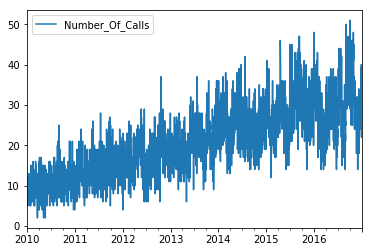

In [95]:
ax = frame1.plot()
plt.show()
#frame1.plot(title= 'plot')

## Question 4.a (1)

Does it seem as if your data requires any transforms, in order for you to a build your forecast?

Type The variation seems to be increaing with the time, thus a mathematical transformation seems to be more appropriate, therefore we may apply the box-cox tranformation of the form.

## Question 4.b (1)


Since you are going to be making a **MONTHLY** forecast you should now apply some calendar adjustments to your data to imporove your forecasts.

In [96]:
series = pd.Series(frame1['Number_Of_Calls'],index = frame1.index)
df_cal_adjust = None

In [97]:
Series = series.resample('M').sum()

In [98]:
Series[:10]

2010-01-31    260.0
2010-02-28    279.0
2010-03-31    296.0
2010-04-30    326.0
2010-05-31    284.0
2010-06-30    304.0
2010-07-31    314.0
2010-08-31    350.0
2010-09-30    352.0
2010-10-31    349.0
Freq: M, Name: Number_Of_Calls, dtype: float64

In [99]:
Series1 = Series/ Series.index.days_in_month
Series1[:10]

2010-01-31     8.387097
2010-02-28     9.964286
2010-03-31     9.548387
2010-04-30    10.866667
2010-05-31     9.161290
2010-06-30    10.133333
2010-07-31    10.129032
2010-08-31    11.290323
2010-09-30    11.733333
2010-10-31    11.258065
Freq: M, Name: Number_Of_Calls, dtype: float64

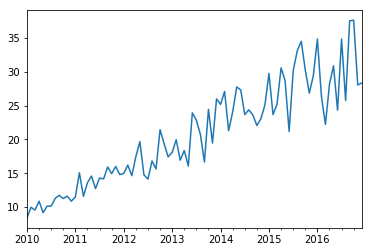

In [100]:
Series1.plot()
plt.show()

## Question 4.c (1)

Set the value of the parameter lam6da below equal to the correct value for a Box-Cox transform for your calendar adjusted data.

In [103]:

tranformedData, lam6da = boxcox(Series1) 
print(lam6da)

0.386813193906


## Question 4.d (1)

Apply the Box-Cox transform with the correct lam6da to your calendar adjusted data and produce the final plot.

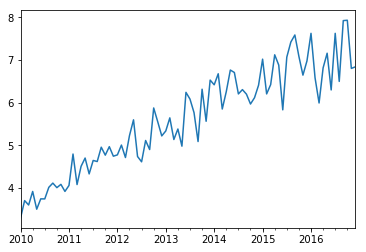

In [104]:
Series_transformed = pd.Series(tranformedData,index = Series.index)
Series_transformed.plot()
plt.show()

## Question 5

Question 5 onwards will use the calendar adjusted data set produced in question 4.c and 4.d

## Question 5.a (1)

Your data may have some seasonality. Produce the ACF plot and PACF plot that will allow you to identify any seasonality. It may be worthwhile to do this on both the Box-Cox adjusted and unadjusted values.

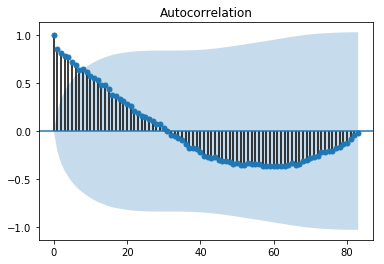

In [111]:
plot_acf(Series_transformed)
plt.show()

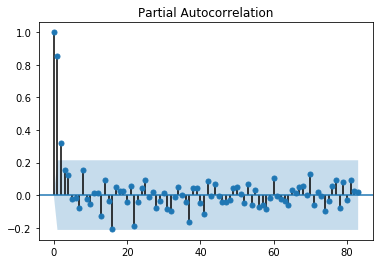

In [113]:
plot_pacf(Series_transformed)
plt.show()

## Question 5.b (1)

Does your data have any seasonality? If so what is the lag? What does the large value at lag 1 indicate in the PACF plot?

## Question 5.c (1)

Produce a statistical measure of your confidence in the above seasonlity lag?

In [120]:
box_test = pd.DataFrame(columns=[])
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(Series_transformed, lags=1, boxpierce=True)
print('Box-Pierce test\n \t X-squared = %s, p-value = %s'%(bpvalue[-1], bppvalue[-1]) ) 
print('Box-Ljung test \n \t X-squared = %s, p-value = %s'%(lbvalue[-1], lbpvalue[-1]) )

Box-Pierce test
 	 X-squared = 61.3304613518, p-value = 4.82556367849e-15
Box-Ljung test 
 	 X-squared = 63.5472250151, p-value = 1.56568010349e-15


## Question 6.a (1)

Do three initial forecasts for one month ahead using the Naive, Mean and Seasonal Naive methods. 
Print out your forecast and the prediction intervals. If you had no seasonal component then use a lag of 12 for the Seasonal Naive.

In [156]:
def snaive(y, h):
    period = {'QS-JAN':4,'M':12,'D':365}[y.index.freqstr]
    index = y.index.shift(h)[-h:]
    temp = pd.Series( [0]*h, index=index)
    for i in range(h):
        temp.iloc[i] = y.iloc[-period:].values.T[i%period]
    return temp

In [157]:
def meanf(y, h):
    values = np.ones(h)*y.values.mean()
    index = y.index.shift(h)[-h:]    
    return pd.Series(values, index=index)

In [161]:
def naive(y, h):
    values = np.ones(h)*y[-1:].values[0]
    index = y.index.shift(h)[-h:] 
    return pd.Series(values, index=index)

In [210]:
ValueN = naive(Series_transformed,1).values
Const = 1.96*(np.std(Series_transformed.values))
lowerN =  ValueS - Const
UpperN = ValueS + Const

In [212]:
print('naive : Predicted = %.5f , interval = [%.5f , %.5f]'%(ValueN,lowerN,UpperN))


naive : Predicted = 6.84222 , interval = [5.31154 , 9.94358]


In [213]:
ValueM = meanf(Series_transformed,1).values
lowerM = ValueM - Const
UpperM = ValueM + Const

In [214]:
print ('Mean : Predicted Value = %.5f, interval = [%.5f , %.5f]'%(ValueM,lowerM,UpperM))

Mean : Predicted Value = 5.62695, interval [3.31093 , 7.94297]


In [215]:
ValueS =  snaive(Series_transformed,1).values
LowerS = ValueS - Const
UpperS = ValueS + Const

In [217]:
print ('Seasonal Naive : Predicted Value = %.5f, interval = [%.5f , %.5f]' %(ValueS,LowerS,UpperS))

Seasonal Naive : Predicted Value = 7.62756, interval = [5.31154 , 9.94358]


## Question 6.b (1)

It is possible to use the RMSE, MAE and MAPE to asses which of the above forecasts added the most value. Produce a table that outputs these values. You do not need to split your data into test and training sets for this evaluation. Just do the evaluation in-sample.

In [219]:
def accuracy(y_cap, y,is_ts=True, is_seasonal=True):
    e = y-y_cap
    RMSE = (e**2.).mean()**0.5
    MAE = e.abs().mean()
    MAPE = (100.*e/y).abs().mean()
    q = e/((y-y.shift({'QS-JAN':4,'M':12,'W':52,'D':365}[y.index.freqstr])).abs()).mean() if is_ts and is_seasonal else \
        e/((y-y.shift(1)).abs()).mean() if is_ts else \
        e/((y-y.mean()).abs()).mean()
    MASE = q.abs().mean()
    return RMSE, MAE, MAPE, MASE



In [226]:
Series_transformed_results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'MASE'])
Series_transformed_results.loc['Mean method'] = accuracy(ValueM, Series_transformed)
Series_transformed_results.loc['Naive method'] = accuracy(ValueN, Series_transformed)
Series_transformed_results.loc['Seasonal Naive method'] = accuracy(ValueM,Series_transformed)
Series_transformed_results

,RMSE,MAE,MAPE,MASE
Mean method,1.181642,1.020033,19.651043,1.559832
Naive method,1.695042,1.370234,29.604776,2.095359
Seasonal Naive method,1.181642,1.020033,19.651043,1.559832


## Question 6.c (1)

Produce the in-sample residuals for the Seasonal Naive forecast from 6.a. Do an evaluation of the residuals by producing a plot of the histogram of residuals, the ACF and PACF.

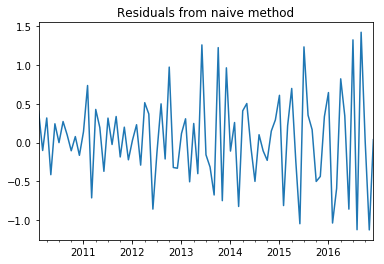

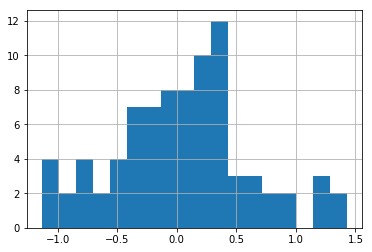

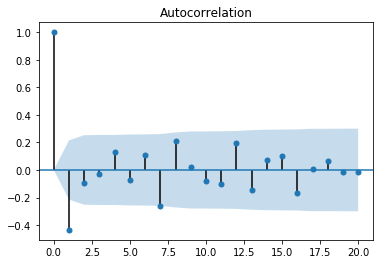

In [234]:
res = (Series_transformed - Series_transformed.shift(1))[1:]
res.rename(columns={'Series_transformed': 'Series_transformed.res'}, inplace=True)
res.plot(title='Residuals from naive method')
plt.show()
res.hist(bins=18)
plt.show()
plot_acf(res,lags=20)
plt.show()
plt.show()

## Question 6.d (1)

What can you say about the quality of your forecast given the plots produced in 6.c?

## Question 7.a (1)

Its clear that the data has a trend in it. It is possible to produce a forecast using linear regression to capture this trend. Produce a forecast of your data using linear regression. This will require your data to be split into a test and training set. Use the last year of data for test.

## Question 7.b (1)

It is possible to use the RMSE, MAE and MAPE to asses which of the above forecasts was the most accurate. Produce a table that outputs these values for Naive, Seasonal Naive, Mean and Linear Regression methods. This should use the training and test sets appropriatly.

## Question 7.c (1)

Produce the residuals for the Linear Regression forecast. Do an evaluation of the residuals by producing a plot of the histogram of residuals and the ACF and PACF.

In [ ]:

plt.show()

## Question 7.d (1)

What can you say about the quality of your forecast given the plots produced in 7.c?

## Question 8.a (1)

If we had a really good forecast for the total hours usage on our network in a given month. We may be able to forecast Total Number of Calls made. How would you go about producing such a forecast?

## Question 8.b (1)

Produce a plot to evaluate if the forecast in 8.a is a reasonable approach.

In [ ]:

plt.show()